In [3]:
#1. Loại trang sức (gem) nào được sử dụng nhiều nhất trong các sản phẩm
#2. Kim loại (metal) nào được sử dụng nhiều nhất
#3. Giá trung bình đồ trang sức phân theo kim loại là bao nhiêu
#4. Giá trung bình của mỗi kim loại là bao nhiêu
#5. Có bao nhiêu trang sức trong mỗi loại sản phẩm
#6. Giá trung bình của trang sức  (gem) trong mỗi loại sản phẩm
#7. Top loại trang sức đắt tiền nhất

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  


In [2]:
cartier = pd.read_csv('D:\\DA\\cartier_catalog.csv')
cartier.head()

,ref,categorie,title,price,tags,description,image
0,B4084600,rings,Love ring,1650.0,yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png
1,B4084900,rings,Love ring,3650.0,platinum,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png
2,B4084800,rings,Love ring,1650.0,pink gold,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png
3,B4084700,rings,Love ring,1770.0,white gold,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png
4,B4085000,rings,Love wedding band,1070.0,yellow gold,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png


In [3]:
cartier.tags.value_counts()

white gold, diamonds                                         121
pink gold, diamonds                                          100
yellow gold, diamonds                                         60
yellow gold                                                   45
pink gold                                                     38
                                                            ... 
pink gold, black lacquer, onyx, tsavorite garnets              1
white gold, lacquer, tsavorite garnets, onyx                   1
pink gold, emeralds, obsidians, diamonds                       1
yellow gold, emeralds, chrysoprases, carnelians, diamonds      1
white gold, pearl                                              1
Name: tags, Length: 103, dtype: int64

In [4]:
cartier['str_split'] = cartier['tags'].str.split(',')

In [5]:
cartier.head(10)

,ref,categorie,title,price,tags,description,image,str_split
0,B4084600,rings,Love ring,1650.0,yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png,[yellow gold]
1,B4084900,rings,Love ring,3650.0,platinum,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png,[platinum]
2,B4084800,rings,Love ring,1650.0,pink gold,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png,[pink gold]
3,B4084700,rings,Love ring,1770.0,white gold,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png,[white gold]
4,B4085000,rings,Love wedding band,1070.0,yellow gold,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png,[yellow gold]
5,B4085200,rings,Love wedding band,1070.0,pink gold,"Love wedding band, 18K rose gold. Width: 3.6mm.",/content/dam/rcq/car/58/73/14/587314.png,[pink gold]
6,B4085100,rings,Love wedding band,1140.0,white gold,"Love wedding band, 18K white gold. Width: 3.6mm.",/content/dam/rcq/car/59/22/21/592221.png,[white gold]
7,B4085300,rings,Love wedding band,2380.0,platinum,"Love wedding band, 950/1000 platinum. Width: 3...",/content/dam/rcq/car/62/40/10/624010.png,[platinum]
8,B4032400,rings,"Love ring, 3 diamonds",3500.0,"yellow gold, diamonds","Love ring, 18K yellow gold, set with 3 brillia...",/content/dam/rcq/car/58/47/16/584716.png,"[yellow gold, diamonds]"
9,B4087500,rings,"Love ring, 3 diamonds",3500.0,"pink gold, diamonds","Love ring, 18K rose gold, set with 3 brilliant...",/content/dam/rcq/car/58/39/70/583970.png,"[pink gold, diamonds]"


In [6]:
cartier['str_split'] = cartier['tags'].str.split(',')
cartier['metal'] = cartier.str_split.str.get(0).str.strip()
cartier['first_gem'] = cartier.str_split.str.get(1).str.strip()
cartier['second_gem'] = cartier.str_split.str.get(2).str.strip()
cartier['third_gem'] = cartier.str_split.str.get(3).str.strip()
cartier['fourth_gem'] = cartier.str_split.str.get(4).str.strip()
cartier.fillna(0, inplace=True)
del cartier['str_split']



In [7]:
cartier

,ref,categorie,title,price,tags,description,image,metal,first_gem,second_gem,third_gem,fourth_gem
0,B4084600,rings,Love ring,1650.0,yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png,yellow gold,0,0,0,0
1,B4084900,rings,Love ring,3650.0,platinum,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png,platinum,0,0,0,0
2,B4084800,rings,Love ring,1650.0,pink gold,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png,pink gold,0,0,0,0
3,B4084700,rings,Love ring,1770.0,white gold,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png,white gold,0,0,0,0
4,B4085000,rings,Love wedding band,1070.0,yellow gold,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png,yellow gold,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
687,B8301416,earrings,Clash de Cartier earrings Small Model,7500.0,pink gold,"Clash de Cartier earrings, small model, 18K pi...",/content/dam/rcq/car/19/15/81/7/1915817.png,pink gold,0,0,0,0
688,B8301415,earrings,Clash de Cartier earrings Small Model,3900.0,pink gold,"Clash de Cartier earrings, small model, 18K pi...",/content/dam/rcq/car/19/15/81/5/1915815.png,pink gold,0,0,0,0
689,N8515173,earrings,Clash de Cartier earrings Diamonds,13700.0,"pink gold, diamonds","Clash de Cartier earrings, 18K pink gold, each...",/content/dam/rcq/car/18/12/45/3/1812453.png,pink gold,diamonds,0,0,0
690,N8515218,earrings,Clash de Cartier earring Large Model,13700.0,"pink gold, amazonite","Clash de Cartier earring, large model, 18K pin...",/content/dam/rcq/car/20/35/93/8/2035938.png,pink gold,amazonite,0,0,0


In [8]:
cartier.drop(['ref' , 'tags' , 'image' , 'title' , 'description'], axis=1, inplace=True)

In [9]:
gems = pd.concat([cartier['first_gem'] , cartier['second_gem'] , cartier['third_gem'] , cartier['fourth_gem']] , axis=0) 

In [10]:
gems.head()

0    0
1    0
2    0
3    0
4    0
dtype: object

gems_value = gems.value.counts()[1:].to_frame()

In [17]:
gems_value = gems.value_counts()[1:].to_frame()

In [12]:
gems_value.reset_index(inplace=True)

In [14]:
gems_value.columns = ['gems_type', 'counts']

In [15]:
gems_value

,gems_type,counts
0,diamonds,431
1,onyx,90
2,emeralds,70
3,diamond,61
4,yellow gold,37
5,pink gold,37
6,tsavorite garnets,35
7,sapphires,19
8,ceramic,17
9,lacquer,11


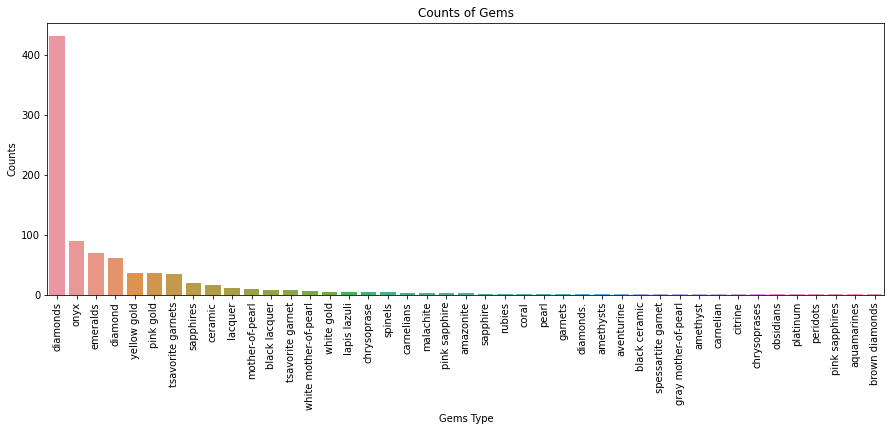

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x='gems_type', y='counts', data = gems_value)
plt.xlabel("Gems Type")
plt.ylabel("Counts")
plt.title("Counts of Gems")
plt.xticks(rotation=90)
plt.show()

In [34]:
cartier_category_metal = cartier.groupby('categorie')['metal'].value_counts().to_frame()

In [35]:
cartier_category_metal.columns= ['count']

In [36]:
cartier_category_metal.reset_index(level = [0 , 1], inplace= True)

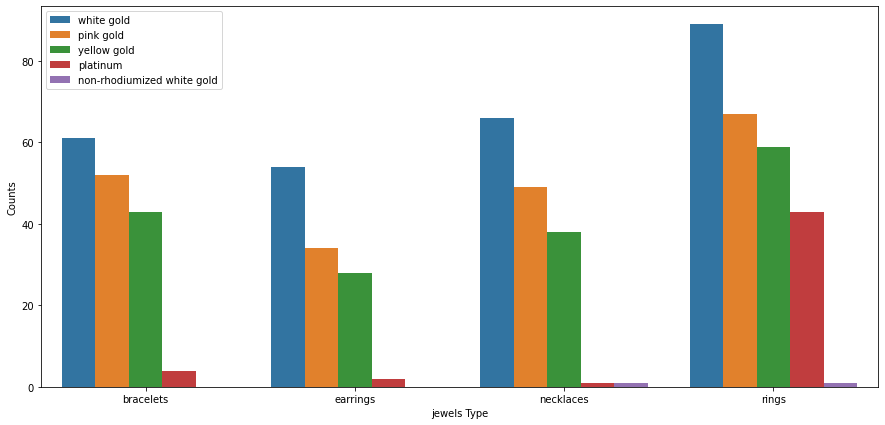

In [41]:
plt.figure(figsize=(15,7))
sns.barplot(x='categorie', y='count', hue='metal',  data= cartier_category_metal)
plt.xlabel("jewels Type")
plt.ylabel("Counts")
plt.legend(loc = "upper left")
plt.show()

In [43]:
cartier_gp1 = cartier.groupby(['categorie','metal'])['price'].mean().round(2).to_frame()

In [44]:
cartier_gp1

price
categorie metal                                
bracelets pink gold                    28741.92
          platinum                    209250.00
          white gold                   50363.28
          yellow gold                  39504.42
earrings  pink gold                     8146.47
          platinum                    117000.00
          white gold                   36350.56
          yellow gold                  11328.21
necklaces non-rhodiumized white gold   19700.00
          pink gold                    18284.49
          platinum                    331000.00
          white gold                   44466.82
          yellow gold                  29280.79
rings     non-rhodiumized white gold   21400.00
          pink gold                     5160.60
          platinum                     18656.28
          white gold                   19224.83
          yellow gold                  11110.51

In [49]:
cartier_gp1.reset_index(level = [0 , 1], inplace= True)

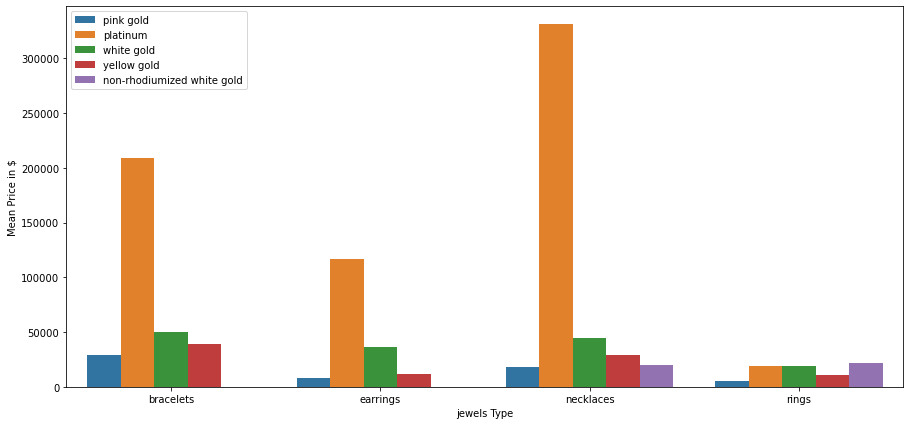

In [50]:
plt.figure(figsize=(15,7))
sns.barplot(x='categorie', y='price', hue='metal',  data= cartier_gp1)
plt.xlabel("jewels Type")
plt.ylabel("Mean Price in $")
plt.legend(loc = "upper left")
plt.show()

In [54]:
cartier_gp2 = cartier.groupby('metal')['price'].mean().round(2).to_frame()

In [56]:
cartier_gp2.reset_index(inplace= True)


In [57]:
cartier_gp2

,metal,price
0,non-rhodiumized white gold,20550.00
1,pink gold,14917.13
2,platinum,44084.40
3,white gold,35855.22
4,yellow gold,22524.23


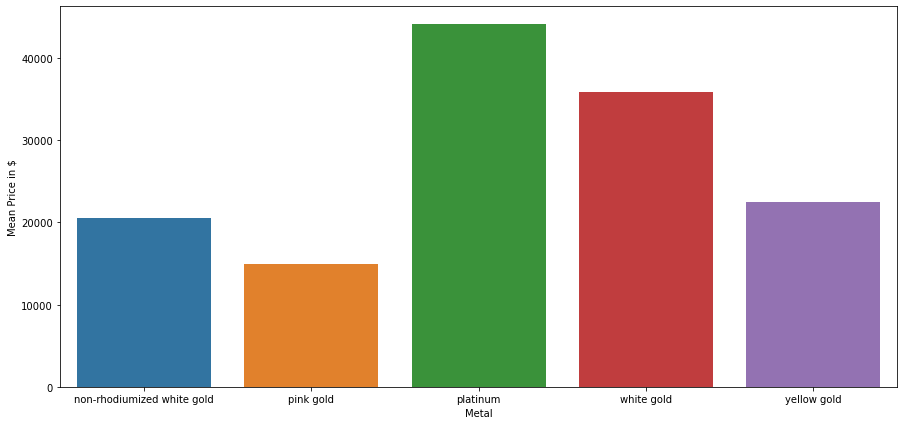

In [60]:
plt.figure(figsize=(15,7))
sns.barplot(x='metal', y='price',  data= cartier_gp2)
plt.xlabel("Metal")
plt.ylabel("Mean Price in $")
plt.show()

In [65]:
cartier_gp3 = cartier.groupby('categorie')['first_gem'].value_counts().to_frame()

In [67]:
cartier_gp3.columns= ['count']
cartier_gp3.reset_index(level = [0 , 1], inplace= True)

In [69]:
cartier_gp3 = cartier_gp3[cartier_gp3!=0]

In [70]:
cartier_gp3

,categorie,first_gem,count
0,bracelets,diamonds,68
1,bracelets,NaN,32
2,bracelets,emeralds,15
3,bracelets,diamond,10
4,bracelets,tsavorite garnets,7
...,...,...,...
68,rings,chrysoprase,1
69,rings,coral,1
70,rings,pink gold,1
71,rings,sapphire,1


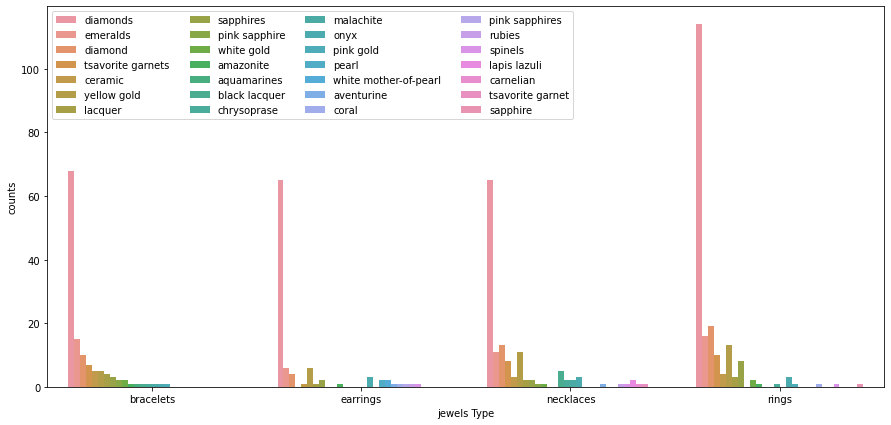

In [75]:
plt.figure(figsize=(15,7))
sns.barplot(x='categorie', y='count', hue='first_gem', data = cartier_gp3)
plt.xlabel("jewels Type")
plt.ylabel("counts")
plt.legend(ncol = 4, loc = "upper left")
plt.show()

In [76]:
cartier_gp1_gem = cartier.groupby(['categorie','first_gem'])['price'].mean().round(2).to_frame()

In [86]:
cartier_gp1_gem = cartier_gp1_gem.reset_index()

In [87]:
cartier_gp1_gem = cartier_gp1_gem[cartier_gp1_gem["first_gem"] !=0]

In [88]:
cartier_gp1_gem

,categorie,first_gem,price
1,bracelets,amazonite,56000.00
2,bracelets,aquamarines,8250.00
3,bracelets,black lacquer,35000.00
4,bracelets,ceramic,13258.00
5,bracelets,chrysoprase,68500.00
...,...,...,...
68,rings,sapphires,68157.50
69,rings,spinels,18500.00
70,rings,tsavorite garnets,8890.00
71,rings,white gold,4975.00


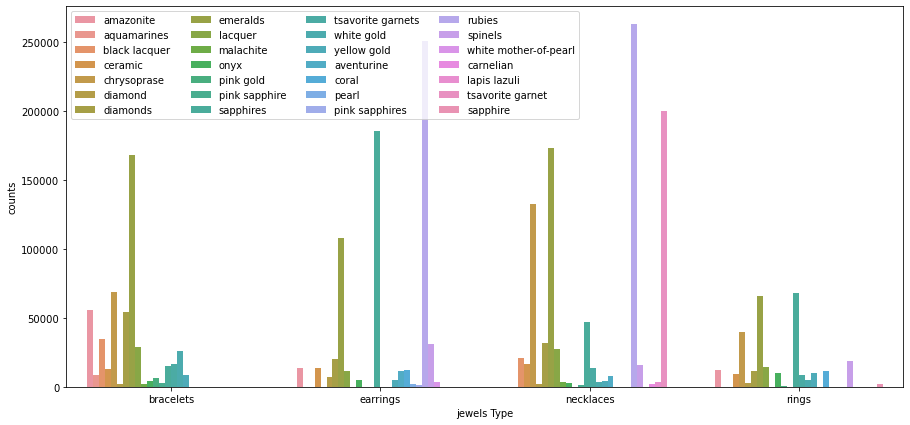

In [89]:
plt.figure(figsize=(15,7))
sns.barplot(x='categorie', y='price', hue='first_gem', data = cartier_gp1_gem)
plt.xlabel("jewels Type")
plt.ylabel("counts")
plt.legend(ncol = 4, loc = "upper left")
plt.show()

In [90]:
cartier_gp2_gem = cartier.groupby(['first_gem'])['price'].mean().round(2).to_frame()

In [91]:
cartier_gp2_gem.reset_index(inplace=True)

In [94]:
cartier_gp2_gem = cartier_gp2_gem[cartier_gp2_gem !=0]

In [95]:
cartier_gp2_gem


,first_gem,price
0,NaN,3635.98
1,amazonite,27400.00
2,aquamarines,8250.00
3,aventurine,9975.00
4,black lacquer,23390.00
5,carnelian,2180.00
6,ceramic,12726.92
7,chrysoprase,93490.00
8,coral,11850.00
9,diamond,2667.39
